In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [4]:
X,y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

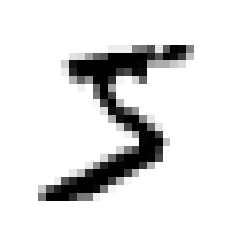

In [6]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [7]:
y[0]

'5'

In [8]:
import numpy as np 
y = y.astype(np.uint8)

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [10]:
y_train_5 = (y_train == 5)
y_test5 = (y_test == 5)

In [11]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [12]:
from sklearn.linear_model import SGDClassifier 

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [13]:
sgd_clf.predict([some_digit])

array([ True])

In [14]:
some_digit

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [15]:
# 성능평가 


In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone 

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train[train_index]
  y_train_folds = y_train_5[train_index]
  X_test_fold = X_train[test_index] 
  y_test_fold = y_train_5[test_index] 

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold) 
  print(n_correct / len(y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.95035
0.96035
0.9604


In [17]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    return self 
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

In [18]:
from sklearn.model_selection import cross_val_score
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [19]:
#3.3.2 오차행렬 

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [20]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_train_5, y_train_pred)

# 행:실제 // 열:예측 
# 0:아닌거, 1:맞는거 


array([[53892,   687],
       [ 1891,  3530]])

In [21]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [24]:
from sklearn.metrics import precision_score, recall_score
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [25]:
from sklearn.metrics import f1_score 
f1_score(y_train5, y_train_pred)

NameError: ignored

3.3.4 정밀도 재현율 트레이드오프 

In [27]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [28]:
threshold = 0 
y_some_digit_pred = (y_scores > threshold)

In [29]:
y_some_digit_pred

array([ True])

In [30]:
threshold = 8000 
y_some_digit_pred = (y_scores > threshold)

In [31]:
y_some_digit_pred

array([False])

In [32]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [33]:
from sklearn.metrics import precision_recall_curve 
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [34]:
precisions

array([0.09040123, 0.09038606, 0.09038757, ..., 1.        , 1.        ,
       1.        ])

In [35]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], 'b--', label = '정밀도')
  plt.plot(thresholds, recalls[:-1], 'g-', label='재현율')



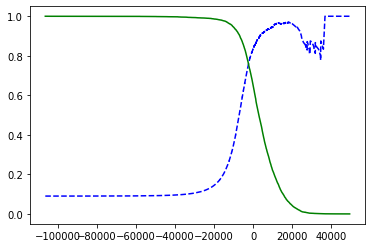

In [36]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [37]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [38]:
threshold_90_precision

3370.0194991439557

In [40]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [41]:
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [42]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [43]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [44]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [45]:
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

# 3.4 다중 분류

- 둘 이상의 클래스를 구별 
- 보통은 SGD분류기, 랜덤포레스트 분류기, 나이브베이즈 분류기를 사용하면 다중 클래스 분류할 수 있음 
- 이진 분류기 사용해서도 다중 클래스 분류 할 수 있음 
 
 1) 이진 분류기를 여러 개 사용하여 다중 클래스를 분류 

       1-1) 이미지 분류 시 각 분류기의 결정 점수 중 가장 높은 것을 클래스로 선택 (OvR , OvA 전략) 

       1-2) 각 숫자의 조합마다 이진 분류기 훈련 (OvO 전략) -> 클래스가 N개라면 분류기는 N(N-1)/2개 필요

 2) 대부분 알고리즘은 OvR을 선호, SVM같은 알고리즘은 OvO 선호 

### 3.4.1 서포트벡터머신 분류기(OvO) - 각 숫자 조합마다 이진 분류기 훈련 

In [47]:
# 서포트벡터머신 분류기 
from sklearn.svm import SVC
svm_clf = SVC() 
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [62]:
some_digit_scores = svm_clf.decision_function([some_digit]) # 각 클래스별 결정점수 확인 
some_digit_scores # 5가 제일 높게 나옴 

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [60]:
# 다른값은 어떻게 나오는지만 확인 
some_digit_scores = svm_clf.decision_function([X[1]]) # y[1] = 0
some_digit_scores 

array([[ 9.31776763,  0.69966542,  8.26937495,  3.82063539, -0.30671293,
         7.27141643,  3.80978873,  1.72165536,  6.0316466 ,  3.83885601]])

In [63]:
np.argmax(some_digit_scores) #가장 큰 값의 인덱스 반환 

5

In [64]:
svm_clf.classes_ # 타깃 클래스의 리스트 반환 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [65]:
svm_clf.classes_[5] # 6번째 클래스의 값 반환 

5

## 3.4.2 SVC기반 OvR 다중분류기

* OneVsOneClassifier, OneVsRestClassifier (OvO, OvR 사용하도록 강제하기) 
* 여기서는 SVC 기반으로 OvR 전략 사용하는 다중분류기 생성 - 이미지 분류 시 각 분류기의 결정 점수 중 가장 높은 것을 클래스로 선택 

In [67]:
from sklearn.multiclass import OneVsRestClassifier # 30분 이상 소요돼서 중단시켰습니다. 
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train,y_train)
ovr_clf.predict([some_digits])

KeyboardInterrupt: ignored

In [ ]:
len(ovr_clf.estimators_)

## 3.4.3 SGD 다중분류기 

In [68]:
sgd_clf.fit(X_train,y_train) # SGD classifier 훈련 (SGD는 직접 다중분류가능하므로 OvO, OvR 적용하지 않아도 됨)

NameError: ignored

In [83]:
some_digit = X[0]

In [84]:
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [82]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [85]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [90]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy') # 분류기 검증에 교차 검증 사용 

array([0.87365, 0.85835, 0.8689 ])

In [92]:
from sklearn.preprocessing import StandardScaler # 정확도 높이기 위해 입력 스케일 조정 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy') # 스케일링 한 이후에 정확도가 향상됨 

array([0.8983, 0.891 , 0.9018])

# 3.5 에러 분석

- 전제 : 가능성이 높은 모델을 하나 찾았다고 가정하고 이 모델의 성능을 향상시킬 방법을 찾기 
- 그 중 한 방법은 만들어진 에러의 종류를 분석하는 것 

## 3.5.1 오차 행렬

* 혼돈 행렬 :  특정 분류 모델의 성능을 평가하는 지표. 실제값과 모델이 예측한 예측값을 한 눈에 알아볼 수 있게 배열한 행렬

In [101]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3) # K-fold로 예측 
conf_mx = confusion_matrix(y_train, y_train_pred) # 혼돈행렬 그리기 (행:실제, 열:예측) 
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

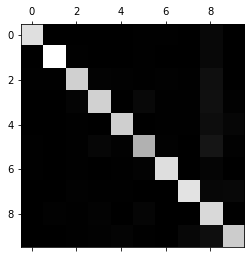

In [102]:
plt.matshow(conf_mx, cmap=plt.cm.gray) # 대각선에 있으면 실제값과 예측값이 동일한거. 
plt.show()

In [107]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums 
norm_conf_mx

array([[9.41583657e-01, 0.00000000e+00, 3.71433395e-03, 8.44166807e-04,
        1.35066689e-03, 7.25983454e-03, 6.07800101e-03, 1.01300017e-03,
        3.79875063e-02, 1.68833361e-04],
       [0.00000000e+00, 9.49273213e-01, 5.48798576e-03, 3.55977455e-03,
        5.93295758e-04, 6.52625334e-03, 5.93295758e-04, 1.03826758e-03,
        3.14446752e-02, 1.48323939e-03],
       [4.53172205e-03, 4.53172205e-03, 8.76132931e-01, 1.54414233e-02,
        1.22524337e-02, 4.53172205e-03, 1.12453844e-02, 6.04229607e-03,
        6.34441088e-02, 1.84625713e-03],
       [3.58832164e-03, 2.77279400e-03, 1.90833469e-02, 8.52552602e-01,
        3.26211059e-04, 3.31104224e-02, 4.40384929e-03, 6.52422117e-03,
        6.57315283e-02, 1.19067036e-02],
       [2.05409106e-03, 2.39643958e-03, 7.01814447e-03, 1.54056830e-03,
        8.87024991e-01, 2.05409106e-03, 5.81992468e-03, 4.62170490e-03,
        5.93974666e-02, 2.80725779e-02],
       [4.98063088e-03, 2.76701716e-03, 5.53403431e-03, 3.09905921e-02,
   

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

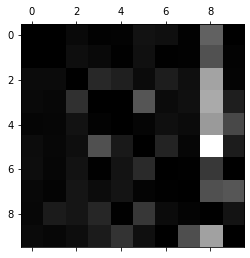

In [108]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt

* 오차행렬 보면 밝은 쪽이 오차가 많은것 
* 행 : 실제클래스, 열 : 예측클래스 
* 실제 8은 잘 분류되었으나,다른 클래스가 8로 잘못 분류된 경우가 많음 
* 5랑 3도 잘못 분류됨 

In [115]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")


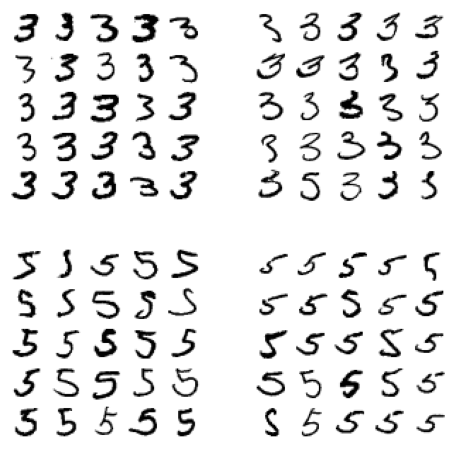

In [116]:
cl_a, cl_b = 3, 5 
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

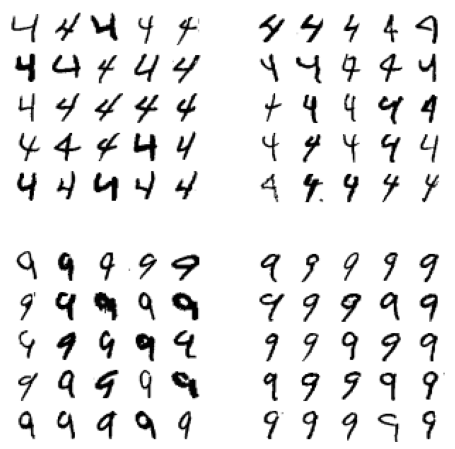

In [118]:
cl_a, cl_b = 4, 9 
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()